## Regression to predict profit

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic microalgae business dataset
capital = np.abs(np.round(np.random.uniform(50000, 300000, 200)))
duration = np.abs(np.round(np.random.uniform(1, 12, 200)))
profit = np.abs(np.round(0.5 * capital + 2 * duration + np.random.normal(500, 1000, 200)))

# Create a DataFrame for the synthetic dataset
data = pd.DataFrame({'Capital (Rp)': capital, 'Duration (Month)': duration, 'Profit (Rp)': profit})

In [ ]:
data

,Capital (Rp),Duration (Month),Profit (Rp)
0,143635.0,8.0,73639.0
1,287679.0,2.0,144365.0
2,232998.0,3.0,117687.0
3,199665.0,11.0,100044.0
4,89005.0,8.0,45343.0
...,...,...,...
195,137302.0,11.0,68342.0
196,231489.0,10.0,116535.0
197,274278.0,6.0,137601.0
198,271772.0,9.0,136165.0


In [ ]:
# Normalize the features
scaler = StandardScaler()
data[['Capital (Rp)', 'Duration (Month)']] = scaler.fit_transform(data[['Capital (Rp)', 'Duration (Month)']])
data['Profit (Rp)'] = (data['Profit (Rp)'] - np.mean(data['Profit (Rp)'])) / np.std(data['Profit (Rp)'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[['Capital (Rp)', 'Duration (Month)']], data['Profit (Rp)'], test_size=0.2, random_state=42
)

In [ ]:
# Build a more complex neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=[2]),
    tf.keras.layers.Dropout(0.2),  # Adding dropout for regularization
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)  # No activation for regression task
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model with early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/100
5/5 [==============================] - 2s 57ms/step - loss: 1.1650 - accuracy: 0.0000e+00 - val_loss: 1.0237 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.9596 - accuracy: 0.0000e+00 - val_loss: 0.8878 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.8501 - accuracy: 0.0000e+00 - val_loss: 0.7601 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.7381 - accuracy: 0.0000e+00 - val_loss: 0.6479 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6187 - accuracy: 0.0000e+00 - val_loss: 0.5476 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.5187 - accuracy: 0.0000e+00 - val_loss: 0.4578 - val_accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.4566 - accuracy: 0.0000e+00 - val_loss

In [ ]:
user_capital = float(input("How much capital do you have (in Rupiah)? "))
user_duration_months = float(input("How long do you want to get profit (in months)? "))

# Create input array without normalizing the duration
user_input = np.array([[user_capital, user_duration_months]])

# Make predictions without normalizing the duration
predicted_profit = model.predict(user_input)

# Display the prediction
print(f"\nEstimated Profit: Rp{predicted_profit[0][0]}")

How much capital do you have (in Rupiah)? 40000
How long do you want to get profit (in months)? 4
1/1 [==============================] - 0s 154ms/step

Estimated Profit: Rp30250.376953125


#Line for figure out model accuracy

2/2 [==============================] - 0s 7ms/step


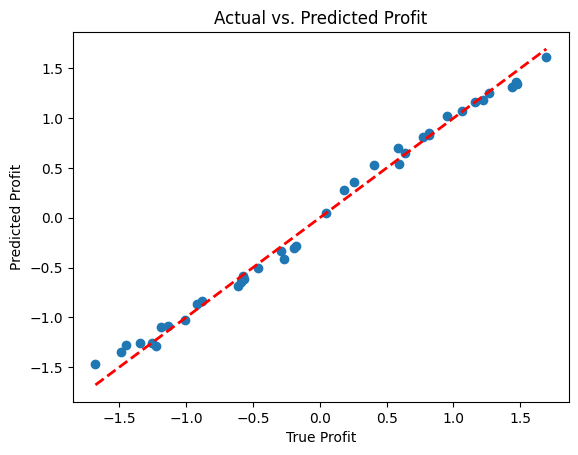

In [ ]:
# This section does not need to be implemented

import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_normalized = model.predict(X_test)
y_pred_denormalized = y_pred_normalized * np.std(data['Profit (Rp)']) + np.mean(data['Profit (Rp)'])

# Denormalize true values
y_test_denormalized = y_test * np.std(data['Profit (Rp)']) + np.mean(data['Profit (Rp)'])

# Visualize the results
plt.scatter(y_test_denormalized, y_pred_denormalized)
plt.plot([min(y_test_denormalized), max(y_test_denormalized)], [min(y_test_denormalized), max(y_test_denormalized)],
         color='red', linestyle='--', linewidth=2)  # Diagonal line for reference
plt.xlabel('True Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs. Predicted Profit')
plt.show()